Hands-on Assignment: Detecting Patterns with Unsupervised Learning

Buatlah kelompok yang terdiri dari 2-3 siswa dan ikuti instruksi berikut:

Task: Cluster Analysis on a Real-World Dataset

1. Pilih Dataset

Gunakan dataset yang disarankan berikut:
Customer Segmentation
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
2. Data Preprocessing

Memuat dataset menggunakan Python (pandas, sklearn.datasets, or seaborn)
Menangani missing values (jika ada)
Menormalkan/menskalakan fitur menggunakan StandardScaler atau MinMaxScaler
Pilih dua atau lebih fitur untuk clustering
3. Menerapkan Clustering Algorithms

Menerapkan pengelompokan K-Means untuk mengelompokkan data
Pilih jumlah kluster yang sesuai (gunakan Elbow Method atau Silhouette Score)
Secara opsional, terapkan Gaussian Mixture Models (GMM) dan bandingkan hasilnya
4. Visualize the Clusters

Gunakan scatter plot untuk memvisualisasikan data berkluster (gunakan warna yang berbeda untuk kluster yang berbeda).
Jika menggunakan lebih dari 2 fitur, terapkan Principal Component Analysis (PCA) untuk mengurangi dimensi sebelum visualisasi.
5. Interpretasi dan Temuan

Pola apa yang Anda amati di cluster?
Bandingkan hasil K-Means vs. GMM (jika ada).
Apa potensi aplikasi dunia nyata dari hasil pengelompokan Anda?
 

Kumpulkan:

Python code (Jupyter Notebook or .py script)
Esai (500-800 words) berisi:
Penjelasan mengenai dataset dan mengapa itu dipilih
Penjelasan langkah-langkah prapemrosesan
Hasil pengelompokan dan visualisasi
Interpretasi temuan
Tantangan yang dihadapi dan kemungkinan perbaikan

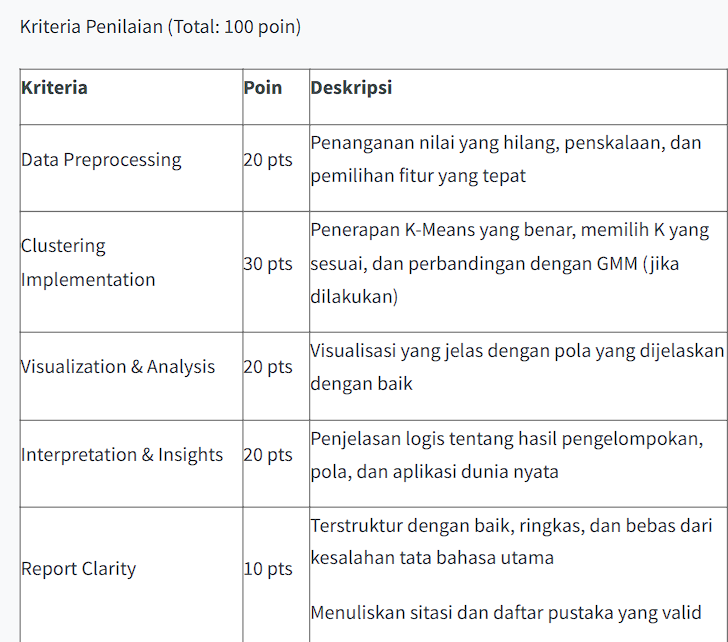

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")


In [3]:
# Load the dataset
path = 'data/dataset.csv'
data = pd.read_csv(path)
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [4]:
df_drop = data.drop('Address', axis=1) # Drop the 'Address' column because it is not useful for clustering

# Drop data with missing values
data = data.dropna() 

# Sum the data with missing values 
print(data.isnull().sum())


Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64


In [ ]:
scaler = StandardScaler()

# Scale the data 
scaled_data = scaler.fit_transform(df_drop)

# for data in df_drop.columns:
#     print(f"Data type of {data}: {df_drop[data].dtype}")


Data type of Customer Id: int64
Data type of Age: int64
Data type of Edu: int64
Data type of Years Employed: int64
Data type of Income: int64
Data type of Card Debt: float64
Data type of Other Debt: float64
Data type of Defaulted: float64
Data type of DebtIncomeRatio: float64


In [ ]:
# Choose features for clustering
# I use Age, Income, and Debt Income Ratio as features for clustering

features = ['Age', 'Income', 'DebtIncomeRatio']
X_selected = df_drop[features]
X_selected_scaled = scaler.fit_transform(X_selected)


Data type of Age: int64
Data type of Income: int64
Data type of DebtIncomeRatio: float64


In [7]:
# 4. Apply Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected_scaled)
    inertia.append(kmeans.inertia_)

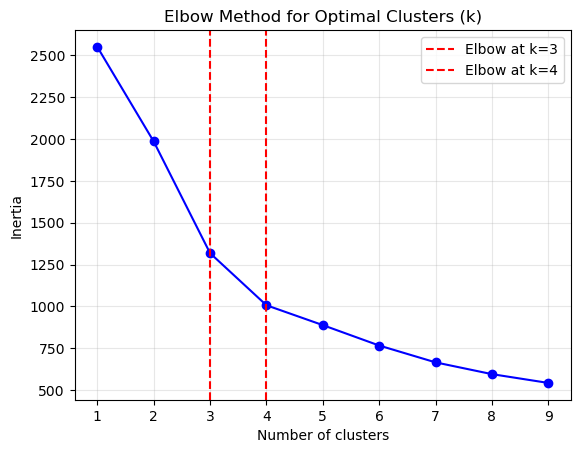

In [30]:
# Visualize the Elbow Method 
import matplotlib.pyplot as plt 
plt.figure()
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters (k)")

elbow_points = [3, 4]

for elbow in elbow_points:
    plt.axvline(x=elbow, color='r', linestyle='--', label=f'Elbow at k={elbow}')

plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


In [9]:
# Kmeans clustering example (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_kmeans = kmeans.fit_predict(X_selected_scaled)

In [10]:
# Gaussian Mixture Model cluster (k=3)
gmm = GaussianMixture(n_components=3, random_state=42)
clusters_gmm = gmm.fit_predict(X_selected_scaled)

In [ ]:
# PCA for visualization 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_scaled)

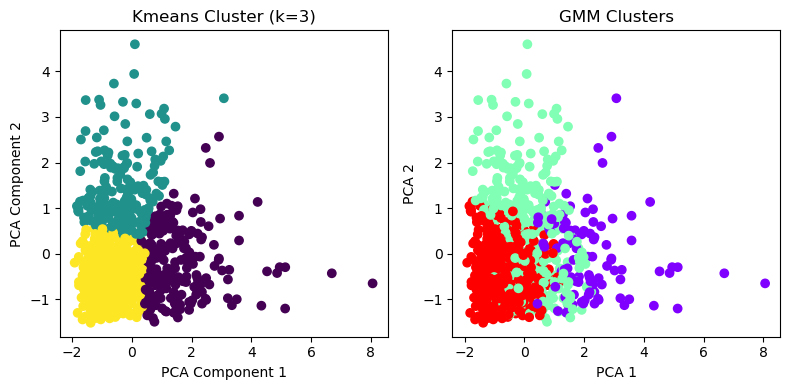

In [43]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_kmeans, cmap='viridis')
plt.title("Kmeans Cluster (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_gmm, cmap='rainbow')
plt.title('GMM Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.tight_layout()

plt.show()

In [13]:
# Save the results in a DataFrane

df_result = df_drop.copy()
df_result["Kmeans_Cluster"] = cluster_kmeans
df_result["GMM_Cluster"] = clusters_gmm

df_result



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Kmeans_Cluster,GMM_Cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1,1
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,2,2
846,847,28,2,7,34,0.359,2.021,0.0,7.0,2,2
847,848,25,4,0,18,2.802,3.210,1.0,33.4,1,1
848,849,32,1,12,28,0.116,0.696,0.0,2.9,2,2


In [33]:
# Check cluster distribution
print(df_result.groupby("Kmeans_Cluster")[features].mean())
print(df_result.groupby("GMM_Cluster")[features].mean())

                      Age     Income  DebtIncomeRatio
Kmeans_Cluster                                       
0               44.379913  83.043668         8.224891
1               33.777778  37.375661        19.796825
2               30.620370  31.465278         6.992593
                   Age      Income  DebtIncomeRatio
GMM_Cluster                                        
0            45.930693  113.425743         9.800000
1            36.495146   52.284790        13.943042
2            31.497727   27.413636         7.608409


Text(0.5, 1.0, 'Kmeans Cluster Distribution')

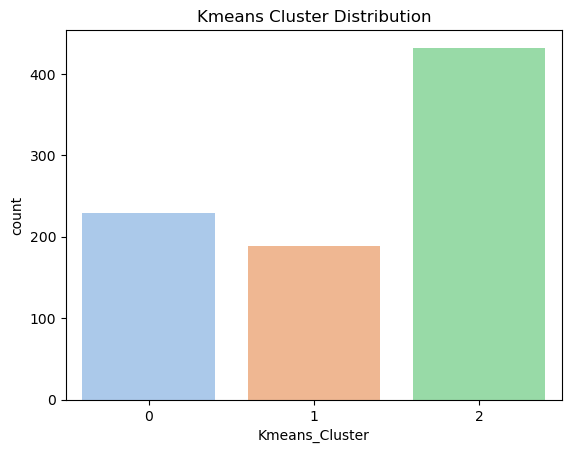

In [24]:
# Visualize the cluster distribution
import seaborn as sns 
plt.figure()
sns.countplot(x="Kmeans_Cluster", data=df_result, palette="pastel")
plt.title("Kmeans Cluster Distribution")

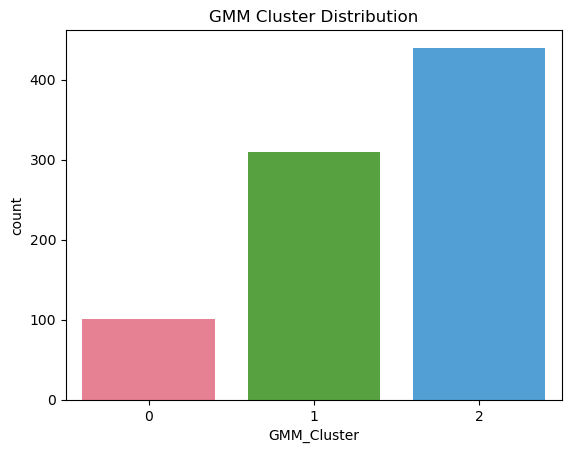

In [26]:
# Visualize GMM CLuster Distribution
plt.figure()
sns.countplot(x="GMM_Cluster", data=df_result, palette="husl")
plt.title("GMM Cluster Distribution")
plt.show()